# Simulation impot concubains

Data FISCI_BIOLOGIC_DESCENDANCE Taken originaly from biologic_child_tentative_2

In [1]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2019-04-26 17:44:11.285000


In [2]:
year = 2013

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import importlib
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import sys

In [6]:
%pwd

u'C:\\Users\\IMPTEMP_A_PACIFIC\\Desktop\\Cohabitant_project(EDP_2015)\\Programme'

In [7]:
import sys
sys.path.append("./income_tax_function")


In [8]:
if year == 2014:
    ir = importlib.import_module("IRPP_from_scratch")
else :
    ir = importlib.import_module("IRPP_from_scratch_{}".format(year))

In [9]:
ir_pacs =  importlib.import_module("IRPP_from_scratch_{}_pacse".format(year))

In [10]:
store_path = '../Data/hdf/edp_2015_final.h5'
Store = pd.HDFStore(store_path)

In [11]:
def load_fisc_i_by_year(year = None):
    df_fisci = pd.read_hdf(store_path, 'FISC_INDIVIDU_{}'.format(year))
    return df_fisci
def load_fisc_r_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_REVENU_{}'.format(year))
    return df_fiscr
def load_fisc_l_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_LOGEMENT_{}'.format(year))
    return df_fiscr

def load_df_fiscrevdet_by_year(year = None):
    df_fiscrevdet = pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year))
    return df_fiscrevdet
    

In [12]:
df_fiscr = load_fisc_r_by_year(year)

In [13]:
print df_fiscr.AN_FISC.iloc[0]

2014


## Test contre simulateur DgFip

In [14]:
salcho_imp = ir.salcho_imp(pd.Series([103456, 103456, 74000]))
parts_fiscales_enfants = ir.parts_fiscales_enfants((pd.Series([4,0,0])))

In [15]:
salcho_imp = ir.salcho_imp(pd.Series([103456, 103456, 74000]))
parts_fiscales_enfants = ir.parts_fiscales_enfants((pd.Series([4,0,0])))

In [16]:
salcho_imp

0    93110
1    93110
2    66600
dtype: float64

In [17]:
ir.ir_avec_qf(salcho_imp, parts_fiscales_enfants)

0     7636.04
1    24710.63
2    14369.20
dtype: float64

In [18]:
ir.ir_avec_plafond_qf_enfant(salcho_imp, parts_fiscales_enfant=parts_fiscales_enfants)

0    15710.63
1    24710.63
2    14369.20
dtype: float64

decote

In [19]:
np.maximum(0,ir.ir_avec_plafond_qf_enfant(salcho_imp, parts_fiscales_enfant=parts_fiscales_enfants) - 
           ir.decote_ir(salcho_imp,parts_fiscales_enfants))

0    15710.63
1    24710.63
2    14369.20
dtype: float64

In [20]:
salaire =  ir.salcho_imp(pd.Series([17000]))
ir.ppe(16000,4 ) 

424.043

In [21]:
np.array(range(2000))

array([   0,    1,    2, ..., 1997, 1998, 1999])

### Test contre simulateur DgFip PACS

In [22]:
salcho_imp = ir.salcho_imp(pd.Series([55000, 55000,155000]))
parts_fiscales_enfants = ir.parts_fiscales_enfants((pd.Series([0,1,1])))

In [23]:
salcho_imp

0     49500
1     49500
2    142903
dtype: float64

In [24]:
ir_pacs.ir_avec_qf(salcho_imp, parts_fiscales_enfants)

0     4230.32
1     3555.40
2    28843.90
dtype: float64

In [25]:
ir_pacs.ir_avec_plafond_qf_enfant(salcho_imp, parts_fiscales_enfants)

0     4230.32
1     3555.40
2    30161.29
dtype: float64

In [26]:
28844-31661

-2817

In [27]:
28844.29+817+500

30161.29

# Match avec les déclarations fiscales individuelles.

In [28]:
path = (u"./Pickle/final_select_rev_{}.p".format(year))

In [29]:
import pickle
select_id_fisc_log = pickle.load(
            open(path, 'rb'))

In [30]:
df_fisci = load_fisc_i_by_year(year)
df_fisci_select =  df_fisci[df_fisci.ID_FISC_LOG_DIFF.isin(select_id_fisc_log)]

In [31]:
df_fisci_select['SEXE'] = df_fisci_select.SEXE.fillna(0).astype('int')

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
df_fisci_select.groupby('ID_FISC_LOG_DIFF')['ID_FISC_FOY_DIFF'].nunique().value_counts()

2    173865
dtype: int64

In [33]:
del df_fisci

In [34]:
select = df_fisci_select.ID_FISC_FOY_DIFF

In [35]:
df_revdet =  pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year)) 
df_revdet_select = df_revdet[df_revdet.ID_FISC_FOY_DIFF.isin(select)]
df_revdet_select['TYPE_FISC'] = df_revdet_select.TYPE_FISC.astype('str')
df_revdet_select = df_revdet_select.merge(df_fisci_select, on = [
        'ID_FISC_FOY_DIFF','ORDREFIP', 'TYPE_FISC'], how='right').sort('ID_FISC_LOG_DIFF')

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
columns = [u'AN_FISC_x', u'ID_FISC_FOY_DIFF', u'ID_FISC_LOG_DIFF', u'ORDREFIP', u'TYPE_FISC',
       u'REV_PRINC', u'YSALI', u'YCHOI', u'YRSTI', u'YALRI', u'YRAGI',
       u'YBICI', u'YBNCI', u'ID_DIFF', u'AN_FISC_y',
       u'SEXE', u'JNAIS', u'MNAIS', u'ANAIS', u'CODNAIS', u'CIDECI', u'ZOXYZD',
       u'DACOED', u'ZOXYZP', u'DACOEP', u'T_CHARGE', u'CNCOIPV', u'CSDEP',
       u'CNE1', u'COM_NSCAT', u'COM_SCAT1', u'COM_SCAT2', u'I_FISC_LOGEMENT',
       u'I_FISC_REVENU', u'TYPE_DECL', u'TYPE_PRES', u'POIDS_FIDELI']

In [37]:
df_revdet_select = df_revdet_select.sort(['ID_FISC_LOG_DIFF', 'ID_FISC_FOY_DIFF'])[columns]

In [38]:
rev_sal = df_revdet_select[['YSALI','YCHOI']].sum(axis = 1)

In [39]:
salcho_imp = ir.salcho_imp(rev_sal)
#TODO : tester lequel des deux marche le mieux
# rev_sal = df_fisci_revdet[['YSALI','YCHOI']].sum(axis = 1)

In [40]:
rpns_var = df_revdet_select[['YRAGI','YBICI','YBNCI']].sum(axis = 1) #rpns-->rev_act_nonsal-->rev_actdf_revdet_select

YRAGI agricol Revenus 
YBICI industriels et commerciaux individuels
YBNCI Revenus non commerciaux individuels

In [41]:
rev_pen_var = df_revdet_select[['YRSTI','YALRI']].sum(axis = 1)

In [42]:
print (df_revdet_select.YALRI>20).value_counts()
print (df_revdet_select.YRSTI>20).value_counts()

False    677812
True      10994
dtype: int64
False    681040
True       7766
dtype: int64


In [43]:
rev_cat = salcho_imp + rpns_var + rev_pen_var
#TODO : chack car fait à l'arrache.

In [44]:
rbg = rev_cat #ne prends pas en compte (nbic_impm_holder) + nacc_pvce  - deficit_ante
rni = rbg # prends pas en compte les abat_spe

In [45]:
df_fisci_revdet= df_revdet_select

In [46]:
df_fisci_revdet["Age"] = year - df_fisci_revdet.ANAIS

In [47]:
df_fisci_revdet["Reduction_impot_pour_etudes"] = (
    ((df_fisci_revdet.Age >10)& (df_fisci_revdet.Age <=14)) *61 +
  ( (df_fisci_revdet.Age >14)& (df_fisci_revdet.Age <=18)) *153 
  # + ( (df_fisci_revdet.Age >18)& (df_fisci_revdet.Age <=25)) *183
).astype('float')

### Crée une variable avec l'age de tout les enfants à la suite

In [48]:
groupie = df_fisci_revdet.groupby('ID_FISC_LOG_DIFF')

In [49]:
groupie.nth(1).Age.iloc[0]

29.0

In [50]:
#df_fisci_revdet.head(0)

In [51]:
df_fisci_revdet["Rni"] = rni

In [52]:
grpby = df_fisci_revdet.groupby('ID_FISC_FOY_DIFF')

In [53]:
grpby_fisci_count = grpby.count()


In [54]:
grpby_fisci_sum = grpby.sum()

In [55]:
grpby_fisci_first = df_fisci_revdet[df_fisci_revdet.TYPE_FISC == "1"].groupby('ID_FISC_FOY_DIFF').first()

In [56]:
#grpby_fisci_first.head(0)

In [57]:
#merge = pd.merge(grpby_fisci.reset_index(), df_fisci_bio, on = 'ID_FISC_FOY_DIFF')

In [58]:
nb_individu_foyer = grpby_fisci_count['AN_FISC_y']
nb_enfant = nb_individu_foyer - 1
grpby_fisci_first['Nb_enfants'] = nb_enfant

In [59]:
parts_fiscales_enfants = ir.parts_fiscales_enfants(nb_enfant)
grpby_fisci_first['Parts_fiscales_enfants'] = parts_fiscales_enfants


In [60]:
grpby_fisci_sum.Rni.shape

(347730L,)

In [61]:
grpby_fisci_first.reset_index()[["Parts_fiscales_enfants", 'Nb_enfants']].head()

,Parts_fiscales_enfants,Nb_enfants
0,3.0,4
1,0.5,1
2,1.0,2
3,0.0,0
4,0.0,0


In [62]:
grpby_fisci_first['Irpp_ss_qf'] = ir.ir_sans_qf(grpby_fisci_sum.Rni)
grpby_fisci_first['Irpp_ac_qf'] = ir.ir_avec_qf(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Irpp_ac_plaf_qf'] = ir.ir_avec_plafond_qf_enfant(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Ppe'] = ir.ppe(grpby_fisci_sum.YSALI, grpby_fisci_first.Nb_enfants)


In [63]:

grpby_fisci_first['Decote'] = ir.decote_ir(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Irpp_decote'] =  np.maximum(0, grpby_fisci_first['Irpp_ac_plaf_qf'] -grpby_fisci_first['Decote'] )
grpby_fisci_first['Irpp_seuil_prelevement'] = ((grpby_fisci_first['Irpp_decote']<=62)*0 +
                                               (grpby_fisci_first['Irpp_decote']>62)*grpby_fisci_first['Irpp_decote'])


In [64]:
grpby_fisci_first["Reduction_impot_pour_etudes"] = grpby_fisci_sum.Reduction_impot_pour_etudes

In [65]:
grpby_fisci_first['Irpp_reduction_impot_etudes'] = np.maximum(0, grpby_fisci_first['Irpp_decote'] - grpby_fisci_sum.Reduction_impot_pour_etudes)
grpby_fisci_first['Irpp_reduction_impot_etudes_seuil'] = ((grpby_fisci_first['Irpp_reduction_impot_etudes']<=62)*0 +
                                               (grpby_fisci_first['Irpp_reduction_impot_etudes']>62)*grpby_fisci_first['Irpp_reduction_impot_etudes'])

In [66]:
#grpby_fisci_first[['Irpp_reduction_impot_etudes', 'Irpp_decote',"Reduction_impot_pour_etudes" ]].head(0)

In [67]:
#grpby_fisci_first[['Irpp_reduction_impot_etudes', 'Irpp_decote',"Reduction_impot_pour_etudes" ]].head(0)

In [68]:
grpby_fisci_first["Rni_pere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 1].Rni
grpby_fisci_first["Rni_mere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 2].Rni

grpby_fisci_first["Salaire_pere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 1].YSALI
grpby_fisci_first["Salaire_mere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 2].YSALI

grpby_fisci_first["Irpp_ac_plaf_qf_pere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 1].Irpp_ac_plaf_qf
grpby_fisci_first["Irpp_ac_plaf_qf_mere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 2].Irpp_ac_plaf_qf

grpby_fisci_first["Irpp_decote_pere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 1].Irpp_decote
grpby_fisci_first["Irpp_decote_mere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 2].Irpp_decote
grpby_fisci_first.loc[grpby_fisci_first['SEXE'] == 1, 'Allocation_pere'] = grpby_fisci_first.Nb_enfants
grpby_fisci_first.loc[grpby_fisci_first['SEXE'] == 2, 'Allocation_mere'] = grpby_fisci_first.Nb_enfants
grpby_fisci_first["Age_pere"] = year - grpby_fisci_first[grpby_fisci_first.SEXE == 1].ANAIS
grpby_fisci_first["Age_mere"] = year - grpby_fisci_first[grpby_fisci_first.SEXE == 2].ANAIS

In [69]:
grpby_fisci_first.Salaire_pere.value_counts(dropna=False).head(4)

NaN       174086
 0         21396
 24000       110
 18000       103
dtype: int64

In [70]:
grpby_fisci_first["Not_touched_by_decote"] = grpby_fisci_first.Irpp_decote == grpby_fisci_first.Irpp_ac_plaf_qf

### Travail sur petit sample dans un premier temps

In [71]:
irpp_by_log_diff = grpby_fisci_first.groupby('ID_FISC_LOG_DIFF').sum().reset_index()

In [72]:
#df = df_fiscr.merge(irpp_by_log_diff, on='ID_FISC_LOG_DIFF')
#df_right = df_fiscr.merge(irpp_by_log_diff, on='ID_FISC_LOG_DIFF', how = 'outer')

In [73]:
small_sample_ripp_fisci = grpby_fisci_first.sort('ID_FISC_LOG_DIFF')
small_sample_ripp_fisci = small_sample_ripp_fisci#.iloc[:1000].reset_index()

In [74]:
#small_sample_ripp_fisci.head()

In [75]:
small_sample_ripp_fiscr = df_fiscr.sort('ID_FISC_LOG_DIFF')#.iloc[0:5000]

In [76]:
%%time
small_merge=pd.merge(small_sample_ripp_fisci.reset_index(), small_sample_ripp_fiscr, on = 'ID_FISC_LOG_DIFF')

Wall time: 33.2 s


In [77]:
small_merge.groupby('ID_FISC_LOG_DIFF').sum().Nb_enfants.head()

ID_FISC_LOG_DIFF
29    3
72    1
87    2
96    3
97    2
Name: Nb_enfants, dtype: int64

Pour chaque logement ayant N enfants on a N+1 allocations possible.

### Touché par la décote

In [78]:
small_sample_ripp_fisci.loc[small_sample_ripp_fisci.ID_FISC_LOG_DIFF == 216,'Nb_enfants'] = pd.Series([0,1]).values

In [79]:
#small_sample_ripp_fisci[small_sample_ripp_fisci.ID_FISC_LOG_DIFF == 216]

Stratégie : On trie par ID_FISC_LOG puis par ID_FOY. ON sépare en fonction du nombre d'enfants pour faire plusieurs moulinettes.
Il y a N+1 allocations possibles.

On veut se retrouver avec une df_fisci qui fait impot8allocation_1, impot_allocation_2,..., impot_allocation_n

Si 1 enfant on fait d'abord l'impot avec toute les parts sur le premier parent, puis sur le deuxième.


#### On isole les 1 enfants

In [80]:
grpby = small_merge.groupby('ID_FISC_LOG_DIFF').sum()
grpby_1_enfant = grpby[grpby.Nb_enfants == 1]
grpby_2_enfant = grpby[grpby.Nb_enfants == 2]
grpby_3_enfant = grpby[grpby.Nb_enfants == 3]
grpby_4_enfant = grpby[grpby.Nb_enfants == 4]
grpby_5_enfant = grpby[grpby.Nb_enfants == 5]
grpby_6_enfant = grpby[grpby.Nb_enfants == 6]
grpby_7_enfant = grpby[grpby.Nb_enfants == 7]
grpby_8_enfant = grpby[grpby.Nb_enfants == 8]



In [81]:
grpby.Nb_enfants.value_counts()

2     74820
1     62513
3     23465
4      8605
5      2137
6      1413
0       296
8       260
7       229
10       57
9        47
12       16
11        7
dtype: int64

In [82]:
#
grpby_dict= dict()
for nb_enf in range(1,9):
    grpby_dict["{}_child".format(nb_enf)] = grpby[grpby.Nb_enfants == nb_enf].reset_index()

In [83]:
#
df_fisci_dict = dict()
for nb_enf in range(1,9):
    small_sample_ripp_fisci["nb_enfant_total"] = nb_enf
    temp = small_sample_ripp_fisci[small_sample_ripp_fisci.ID_FISC_LOG_DIFF.isin( grpby_dict["{}_child".format(nb_enf)].ID_FISC_LOG_DIFF)]
    df_fisci_dict["{}_child".format(nb_enf)] = temp.reset_index().sort(['ID_FISC_LOG_DIFF','ID_FISC_FOY_DIFF'])

In [84]:
for nb_enf in range(1,9): #Teste qu'on a bien toujours que 2 observations dans chaque logement fiscal
    assert  np.all(df_fisci_dict["{}_child".format(1)].groupby("ID_FISC_LOG_DIFF")["ID_FISC_FOY_DIFF"].nunique())

In [85]:
for nb_enf in range(1,9): #Teste qu'on a bien toujours que 2 observations dans chaque logement fiscal
      print df_fisci_dict["{}_child".format(nb_enf)].groupby("ID_FISC_LOG_DIFF")["AN_FISC_x"].count().value_counts()

2    62512
1        1
dtype: int64
2    74818
1        2
dtype: int64
2    23465
dtype: int64
2    8605
dtype: int64
2    2137
dtype: int64
2    1413
dtype: int64
2    229
dtype: int64
2    260
dtype: int64


Sort par le sexe pour que allocation 1 corresponde bien au père qui prend un enfant, et alloc 2 la mere, etc

In [86]:
for nb_enf in range(1,9): 
      df_fisci_dict["{}_child".format(nb_enf)] = df_fisci_dict["{}_child".format(nb_enf)].sort(["ID_FISC_LOG_DIFF","SEXE"])

In [87]:
#
for nb_enf1 in range(1,9):
    df_temp = df_fisci_dict["{}_child".format(nb_enf1)]
    nb_enfant_total= nb_enf1
    for nb_enf2 in range(nb_enfant_total+1):
        df_temp["Nb_enf_allocation_{}".format(nb_enf2+1)] = int(len(df_temp)/2)*[nb_enf2, nb_enfant_total - nb_enf2] 
    df_fisci_dict["{}_child".format(nb_enf)] = df_temp


#### Calcul de l'impot

In [88]:
grpby_fisci_first['Ppe'] = ir.ppe(grpby_fisci_sum.YSALI, grpby_fisci_first.Nb_enfants)
grpby_fisci_first['Decote'] = ir.decote_ir(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Irpp_decote'] =  np.maximum(0, grpby_fisci_first['Irpp_ac_plaf_qf'] -grpby_fisci_first['Decote'] )
grpby_fisci_first['Irpp_seuil_prelevement'] = ((grpby_fisci_first['Irpp_decote']<=62)*0 +
                                               (grpby_fisci_first['Irpp_decote']>62)*grpby_fisci_first['Irpp_decote'])
grpby_fisci_first["Reduction_impot_pour_etudes"] = grpby_fisci_sum.Reduction_impot_pour_etudes
grpby_fisci_first['Irpp_reduction_impot_etudes'] = np.maximum(0, grpby_fisci_first['Irpp_decote'] - grpby_fisci_sum.Reduction_impot_pour_etudes)
grpby_fisci_first['Irpp_reduction_impot_etudes_seuil'] = ((grpby_fisci_first['Irpp_reduction_impot_etudes']<=62)*0 +
                         
                                                          (grpby_fisci_first['Irpp_reduction_impot_etudes']>62)*grpby_fisci_first['Irpp_reduction_impot_etudes'])

In [89]:
#grpby_fisci_first.sort("ID_FISC_LOG_DIFF").head(10)

In [90]:
from scipy import special

In [91]:
## More kind of taxes
for nb_enf in range(1,9):
    df_temp = df_fisci_dict["{}_child".format(nb_enf)]
    
    for alloc_number in range(1,nb_enf+2): # Il y a nb_enf+1 allocations possibles     
        
        ## Decote
        parts_fiscales_enfants = pd.Series(ir.parts_fiscales_enfants(df_temp['Nb_enf_allocation_{}'.format(alloc_number)]))
        decote = ir.decote_ir(df_temp.Rni, parts_fiscales_enfants)
        irpp_ac_plaf_qf = ir.ir_avec_plafond_qf_enfant(df_temp.Rni, parts_fiscales_enfants)
        df_temp['Irpp_decote_allocation_{}'.format(alloc_number)] =  np.maximum(0, irpp_ac_plaf_qf -decote )
        
        ## Seuil prelevement
        
        df_temp['Irpp_decote_seuil_prel_allocation_{}'.format(alloc_number)] =  ((irpp_ac_plaf_qf<=62)*0 +
                                               (irpp_ac_plaf_qf>62)*irpp_ac_plaf_qf)
        

        
        df_fisci_dict["{}_child".format(nb_enf)] = df_temp

In [92]:
#df_fisci_dict["{}_child".format(nb_enf)].head(0)

In [93]:
# Simple

for nb_enf in range(1,9):
    df_temp = df_fisci_dict["{}_child".format(nb_enf)]
    
    for alloc_number in range(1,nb_enf+2): # Il y a nb_enf+1 allocations possibles     
        parts_fiscales_enfants = pd.Series(ir.parts_fiscales_enfants(df_temp['Nb_enf_allocation_{}'.format(alloc_number)]))
        decote = ir.decote_ir(df_temp.Rni, parts_fiscales_enfants)
        irpp_ac_plaf_qf = ir.ir_avec_plafond_qf_enfant(df_temp.Rni, parts_fiscales_enfants)
        df_temp['Irpp_decote_allocation_{}'.format(alloc_number)] =  np.maximum(0, irpp_ac_plaf_qf -decote )
        df_fisci_dict["{}_child".format(nb_enf)] = df_temp

In [94]:
#df_fisci_dict["{}_child".format(2)][['ID_FISC_LOG_DIFF']+['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,4)]+['Irpp_decote']].head()

In [95]:

#df_fisci_dict["{}_child".format(2)][['ID_FISC_LOG_DIFF']+['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,4)]+['Irpp_decote']].head()

In [96]:
select_var= ['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,nb_enf + 2)]+['Irpp_decote']\
            +["ZIMPOM"]

In [97]:
#
result_dict = dict()
for nb_enf in range(1,9):
    result_dict["{}_child".format(nb_enf)] = df_fisci_dict["{}_child".format(nb_enf)
                                                          ].groupby('ID_FISC_LOG_DIFF').sum()#[
       # ['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,nb_enf + 2)]+['Irpp_decote']]]

In [98]:
#result_dict["{}_child".format(1)].head()

In [99]:
#
for nb_enf in range(1,9):
    result = result_dict["{}_child".format(nb_enf)]
    result["result_min_allocation"] = result[['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,nb_enf+2)]].min(axis = 1)
    result["result_max_allocation"] = result[['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,nb_enf+2)]].max(axis = 1)
    result["Gain_fiscal_max"] = result["result_max_allocation"] - result["result_min_allocation"]
    result["Gain_fiscal_max_in_ratio"] =  result["result_min_allocation"]/result["result_max_allocation"] 
    

    result["Fiscal_loss"] =  result["Irpp_decote"] -result["result_min_allocation"]
    result_dict["{}_child".format(nb_enf)] = result

In [100]:
(result.result_min_allocation == result.result_max_allocation).value_counts()

False    146
True      83
dtype: int64

Puisque pas de découte en couple en 2013, on ajoute simplement une part fiscale pour avoir l'impôt avec Pacs

In [101]:
for nb_enf in range(1,9):
    result = result_dict["{}_child".format(nb_enf)]
    parts_fiscales_enfants_pacs = ir.parts_fiscales_enfants(result.Nb_enfants) 
    result["Parts_fiscales_enfants_pacs"] = parts_fiscales_enfants_pacs
    result['Irpp_ac_plaf_qf_pacs'] = ir_pacs.ir_avec_plafond_qf_enfant(result.Rni, parts_fiscales_enfants_pacs) #on ajoute la part du deuxième conjoint
    result['Irpp_ac_qf_pacs'] = ir_pacs.ir_avec_qf(result.Rni, parts_fiscales_enfants_pacs)
    result['Decote_pacs'] = ir_pacs.decote_ir(result.Rni, parts_fiscales_enfants_pacs)
    result['Irpp_decote_pacs'] =  np.maximum(0, result['Irpp_ac_plaf_qf_pacs'] -result['Decote_pacs'] )
    
    
    result_dict["{}_child".format(nb_enf)] = result

In [102]:
result_dict["{}_child".format(3)].Parts_fiscales_enfants.head()

ID_FISC_LOG_DIFF
29     1.5
96     1.5
282    1.5
362    2.0
422    2.0
Name: Parts_fiscales_enfants, dtype: float64

On concatène les tables avant de merger à fiscr (pour avoir ZIMPOM).

In [103]:
frames = result_dict
df = pd.concat(result_dict)

In [104]:
gain_fiscal_au_pacs = df.Irpp_decote - df.Irpp_decote_pacs

In [105]:
df["Montant_gain_fiscal_au_pacs"] = gain_fiscal_au_pacs
df['Gain_fiscal_au_pacs'] = (gain_fiscal_au_pacs>10)
df['Perte_fiscale_au_pacs'] = (gain_fiscal_au_pacs<-10)
df['Neutre_au_pacs'] = (np.abs(gain_fiscal_au_pacs)<10)

In [106]:
gain_fiscal_ss_decote_au_pacs = df.Irpp_ac_plaf_qf - df.Irpp_ac_plaf_qf_pacs

In [107]:
(gain_fiscal_ss_decote_au_pacs<-1).value_counts(normalize = True)

False    1
dtype: float64

Tout le monde gagne en se pacsant si on inclue pas la décote.

In [108]:
print (np.abs(gain_fiscal_au_pacs)<1).value_counts(normalize = True)[True]
print (gain_fiscal_au_pacs<-1).value_counts(normalize = True)[True]
print (gain_fiscal_au_pacs>1).value_counts(normalize = True)[True]

0.304871086609
0.374635980416
0.320492932974


In [109]:
print (np.abs(df.Montant_gain_fiscal_au_pacs)<1).value_counts(normalize = True)[True]
print (df.Montant_gain_fiscal_au_pacs<-1).value_counts(normalize = True)[True]
print (df.Montant_gain_fiscal_au_pacs>1).value_counts(normalize = True)[True]

0.304871086609
0.374635980416
0.320492932974


37% de perdants, et 31% de gagnants au mariage, 30% neutre.

#### Par rang d'enfant

In [110]:

df_table = pd.DataFrame()
for child_number in range(1,6):
    df_table.loc[child_number ,"Neutre"] = (np.abs(df.query("nb_enfant_total=={}".format(child_number*2)).Montant_gain_fiscal_au_pacs)<1).value_counts(normalize = True)[True]
    df_table.loc[child_number ,"Gain"] = (df.query("nb_enfant_total=={}".format(child_number*2)).Montant_gain_fiscal_au_pacs>1).value_counts(normalize = True)[True]    
    df_table.loc[child_number ,"Perte"] = (df.query("nb_enfant_total=={}".format(child_number*2)).Montant_gain_fiscal_au_pacs<-1).value_counts(normalize = True)[True]

In [111]:
df_table

,Neutre,Gain,Perte
1,0.235807,0.294579,0.469614
2,0.262590,0.317255,0.420155
3,0.435457,0.404390,0.160153
4,0.596862,0.360837,0.042301
5,0.721572,0.259242,0.019186


In [112]:
(gain_fiscal_au_pacs<-1).value_counts(normalize = True)

False    0.625364
True     0.374636
dtype: float64

(-2000, 2000)

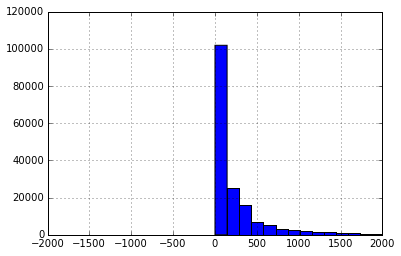

In [113]:
(df.Irpp_ac_plaf_qf - df.Irpp_ac_plaf_qf_pacs).hist(bins = 400)
plt.xlim(-2000,2000)

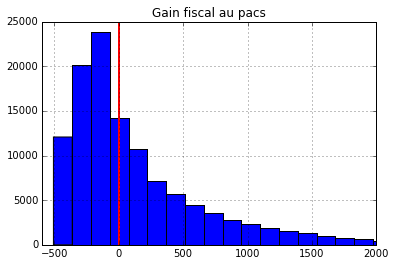

In [114]:
gain_fiscal_au_pacs[(np.abs(gain_fiscal_au_pacs)>10)].hist(bins = 400)
plt.xlim(-2000,2000)
plt.title("Gain fiscal au pacs"); plt.xlim(-600,2000); plt.vlines(0,0,25000, color = 'r', linewidth = 2)

In [115]:
df.Montant_gain_fiscal_au_pacs.min()

-508.00000000000074

In [116]:
result.Parts_fiscales_enfants.head()

ID_FISC_LOG_DIFF
35679    5.0
58546    5.5
59874    5.0
62304    5.0
81116    5.0
Name: Parts_fiscales_enfants, dtype: float64

In [117]:
print ((df.Irpp_ac_qf-df.Irpp_ac_qf_pacs)>-1).value_counts()
print  (np.abs(df.Irpp_ac_qf-df.Irpp_ac_qf_pacs)<1).value_counts(normalize = True)


True    173411
dtype: int64
False    0.571561
True     0.428439
dtype: float64


Personne ne paye plus d'impot avant plafonnement et décote en se pacsant que sans se pacser.

Environ 43% payeraient le même impot.

In [118]:
print ((df.Irpp_ac_plaf_qf-df.Irpp_ac_plaf_qf_pacs)> 10).value_counts(normalize = True)

True     0.580724
False    0.419276
dtype: float64


Par contre 7.4% paieraient plus d'impot à cause du plafonnement du QF.

In [119]:
df.columns

Index([u'ANAIS', u'AN_FISC_x', u'AN_FISC_y', u'Age', u'Age_mere', u'Age_pere',
       u'Allocation_mere', u'Allocation_pere', u'CNE1', u'COM_NSCAT',
       u'COM_SCAT1', u'COM_SCAT2', u'DACOED', u'DACOEP', u'Decote',
       u'Decote_pacs', u'Fiscal_loss', u'Gain_fiscal_max',
       u'Gain_fiscal_max_in_ratio', u'ID_DIFF', u'ID_FISC_FOY_DIFF',
       u'I_FISC_LOGEMENT', u'I_FISC_REVENU', u'Irpp_ac_plaf_qf',
       u'Irpp_ac_plaf_qf_mere', u'Irpp_ac_plaf_qf_pacs',
       u'Irpp_ac_plaf_qf_pere', u'Irpp_ac_qf', u'Irpp_ac_qf_pacs',
       u'Irpp_decote', u'Irpp_decote_allocation_1',
       u'Irpp_decote_allocation_2', u'Irpp_decote_allocation_3',
       u'Irpp_decote_allocation_4', u'Irpp_decote_allocation_5',
       u'Irpp_decote_allocation_6', u'Irpp_decote_allocation_7',
       u'Irpp_decote_allocation_8', u'Irpp_decote_allocation_9',
       u'Irpp_decote_mere', u'Irpp_decote_pacs', u'Irpp_decote_pere',
       u'Irpp_decote_seuil_prel_allocation_1',
       u'Irpp_decote_seuil_prel_alloc

In [120]:
df["Plafond_qf"] = (df.Irpp_ac_qf< df.Irpp_ac_plaf_qf)

In [121]:
rates = np.array([0,0.055, 0.14, 0.3, 0.41, 0.45]) #To modify for specific year 2013
thresholds = [0,6011, 11991, 26631, 71397, 151200]  #To modify for specific year 2013


calcul =  ir.calc([(33559/1.5),(19976)], thresholds, rates)*np.array([1.5,1]); print calcul
print calcul.sum()
calcul =  ir.calc([((33559+19976)/2.5)], thresholds, rates)*np.array([2.5]); print calcul
print calcul.sum()
print "hello", ir.calc([(33559+19976)/2.5,(19976)], thresholds, rates)*np.array([2.5,1])
print ir.ir_avec_qf(np.array([41539,19004]), np.array([0.5,0]))
print ir.ir_avec_plafond_qf_enfant(np.array([41539,19004]), np.array([0.5,0]))

[ 2673.5  1446.8]
4120.3
[ 4120.3]
4120.3
hello [ 4120.3  1446.8]
[ 4045.5   1310.72]
[ 5350.9   1310.72]


In [122]:
print df[df.Irpp_ac_plaf_qf_pacs>df.Irpp_ac_plaf_qf].Plafond_qf.value_counts(normalize = True)
print df[df.Irpp_ac_plaf_qf_pacs>df.Irpp_ac_plaf_qf].Plafond_qf.value_counts(normalize = False)

False    0.951373
True     0.048627
dtype: float64
False    15280
True       781
dtype: int64


In [123]:
df[((df.Irpp_ac_plaf_qf_pacs-df.Irpp_ac_plaf_qf)>1)&(~df.Plafond_qf)][["Rni","Rni_mere", "Rni_pere",u'Allocation_mere', "Parts_fiscales_enfants",
                                                u'Irpp_ac_plaf_qf_pere', u"Irpp_ac_plaf_qf_mere", "Irpp_ac_plaf_qf", "Irpp_ac_qf_pacs", "Irpp_ac_plaf_qf_pacs"]]

,,Rni,Rni_mere,Rni_pere,Allocation_mere,Parts_fiscales_enfants,Irpp_ac_plaf_qf_pere,Irpp_ac_plaf_qf_mere,Irpp_ac_plaf_qf,Irpp_ac_qf_pacs,Irpp_ac_plaf_qf_pacs
,ID_FISC_LOG_DIFF,,,,,,,,,,


In [124]:
# df[["Irpp_decote_mere","Irpp_decote_pere","Decote", "Irpp_decote", "Irpp_decote_pacs","Decote_pacs","result_min_allocation",
#                               "Montant_gain_fiscal_au_pacs"]]

In [125]:
#df.head()

In [126]:
print (df.result_min_allocation == df.Irpp_decote).value_counts()
print (df.result_max_allocation == df.result_min_allocation).value_counts()

True     122017
False     51394
dtype: int64
False    150200
True      23211
dtype: int64


In [127]:
print (df.result_min_allocation == df.Irpp_decote).value_counts(normalize = True)
print (df.result_max_allocation == df.result_min_allocation).value_counts(normalize = True)

True     0.703629
False    0.296371
dtype: float64
False    0.86615
True     0.13385
dtype: float64


In [128]:
df["Gain_fiscal_max_1"] = ((df.Gain_fiscal_max>0)&(df.Gain_fiscal_max<= 1)).astype('int')
df["Gain_fiscal_max_50"] = ((df.Gain_fiscal_max>1)&(df.Gain_fiscal_max<= 50)).astype('int')
df["Gain_fiscal_max_100"] = ((df.Gain_fiscal_max> 50)&(df.Gain_fiscal_max <= 100)).astype('int')
df["Gain_fiscal_max_200"] = ((df.Gain_fiscal_max> 100)&(df.Gain_fiscal_max <= 200)).astype('int')

df["Gain_fiscal_max_300"] = ((df.Gain_fiscal_max> 200)&(df.Gain_fiscal_max <= 300)).astype('int')
df["Gain_fiscal_max_over_300"] = ((df.Gain_fiscal_max > 300)).astype('int')

In [129]:
#pd.crosstab()

In [130]:
df["Do_not_optimize"] = (df.result_min_allocation != df.Irpp_decote)

In [131]:
df["Do_not_optimize_5_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>5
df["Do_not_optimize_10_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>10
df["Do_not_optimize_20_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>20
df["Do_not_optimize_50_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>50
df["Do_not_optimize_100_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>100

In [132]:
optimize_path = (u"./Pickle/optimize/Do_not_optimize_rev_{}.p".format(year))

In [133]:
pickle.dump(df[df.Do_not_optimize_5_euros].reset_index().ID_FISC_LOG_DIFF, 
            open(optimize_path, 'wb'))

In [134]:
print df.Do_not_optimize.value_counts(normalize=True)
print df.Do_not_optimize_5_euros.value_counts(normalize=True)
print df.Do_not_optimize_10_euros.value_counts(normalize=True)
print df.Do_not_optimize_20_euros.value_counts(normalize=True)
print df.Do_not_optimize_50_euros.value_counts(normalize=True)
print df.Do_not_optimize_100_euros.value_counts(normalize=True)

False    0.703629
True     0.296371
dtype: float64
False    0.710405
True     0.289595
dtype: float64
False    0.714061
True     0.285939
dtype: float64
False    0.721373
True     0.278627
dtype: float64
False    0.741026
True     0.258974
dtype: float64
False    0.773002
True     0.226998
dtype: float64


#### Biologic

In [135]:
path = (u"./Pickle/biologic/")
biologic = pickle.load(open(path+"biologic_households2013.p", 'rb'))

In [136]:
df2 = df.reset_index()
df2 = df2[df2.ID_FISC_LOG_DIFF.isin(biologic)]

In [137]:
print df2.Do_not_optimize.value_counts(normalize=True)
print df2.Do_not_optimize_5_euros.value_counts(normalize=True)
print df2.Do_not_optimize_10_euros.value_counts(normalize=True)
print df2.Do_not_optimize_20_euros.value_counts(normalize=True)
print df2.Do_not_optimize_50_euros.value_counts(normalize=True)
print df2.Do_not_optimize_100_euros.value_counts(normalize=True)

False    0.751376
True     0.248624
dtype: float64
False    0.757969
True     0.242031
dtype: float64
False    0.761982
True     0.238018
dtype: float64
False    0.770524
True     0.229476
dtype: float64
False    0.790667
True     0.209333
dtype: float64
False    0.823957
True     0.176043
dtype: float64


In [138]:
from scipy import stats

In [139]:
stats.ttest_ind(df.Do_not_optimize, df2.Do_not_optimize)

Ttest_indResult(statistic=21.220947239541868, pvalue=7.6638163855217121e-100)

In [140]:
df["Do_not_optimize_0_1_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.001
df["Do_not_optimize_0_5_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.005
df["Do_not_optimize_1_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.01
df["Do_not_optimize_2_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.02
df["Do_not_optimize_5_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.05

In [141]:
print df.Do_not_optimize_0_1_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_0_5_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_1_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_2_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_5_prct_income_share.value_counts(normalize = True)

False    0.733402
True     0.266598
dtype: float64
False    0.819366
True     0.180634
dtype: float64
False    0.870643
True     0.129357
dtype: float64
False    0.930673
True     0.069327
dtype: float64
False    0.991535
True     0.008465
dtype: float64


In [142]:
df["Do_not_optimize_95_prct_tax_amount"] =  ((df.Irpp_decote - df.result_min_allocation)/df.Irpp_decote)>0.95
df["Do_not_optimize_90_prct_tax_amount"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Irpp_decote)>0.9
df["Do_not_optimize_50_prct_tax_amount"] =  ((df.Irpp_decote - df.result_min_allocation)/df.Irpp_decote)>0.50
df["Do_not_optimize_5_prct_tax_amount"] = ((df.Irpp_decote - df.result_min_allocation)/df.Irpp_decote)>0.05

In [143]:
df["Optimize_10_prct_tax_amount"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Irpp_decote)<0.9

In [144]:
(df.result_min_allocation<=(df.Irpp_decote)).value_counts(normalize = True)

True    1
dtype: float64

In [145]:
(100-90)/100

0.1

In [146]:
df.Do_not_optimize_90_prct_tax_amount.value_counts(normalize = True)

False    0.93561
True     0.06439
dtype: float64

In [147]:
df.Optimize_10_prct_tax_amount.value_counts(normalize = True)

True     0.682413
False    0.317587
dtype: float64

In [148]:
 (np.abs(2164-2255)/2255)

0.040354767184035474

In [149]:
#df[["Do_not_optimize_90_prct_tax_amount","Optimize_10_prct_tax_amount", "Irpp_decote", "result_min_allocation" ]]

In [150]:
hdf_path = ("./Generated_hdf/optimizers.h5")

In [151]:
df.to_hdf(hdf_path, "optimizers_{}".format(year))

In [152]:
year

2013

In [153]:
import datetime
print datetime.datetime.now()

2019-04-26 17:46:21.390000


In [154]:
df.reset_index(inplace = True)

In [155]:
keep_id_fisc_log_diff = df.ID_FISC_LOG_DIFF

In [156]:
df_fiscr = load_fisc_r_by_year(year)
df_fiscr = df_fiscr[df_fiscr.ID_FISC_LOG_DIFF.isin(keep_id_fisc_log_diff)][['ID_FISC_LOG_DIFF', "ZIMPOM", "ZIMPOM14"]]

In [157]:
df_scatter = pd.merge(df, df_fiscr, on = "ID_FISC_LOG_DIFF")

(0, 1500)

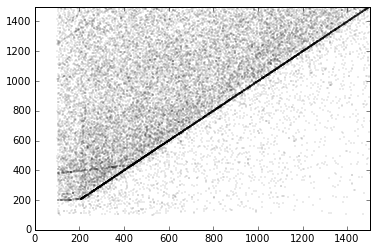

In [158]:
euros_threshold = 100
df_scatter = df_scatter.query("(ZIMPOM>{}) & (Irpp_decote>{})".format(euros_threshold, euros_threshold))
plt.scatter(df_scatter.ZIMPOM, df_scatter.Irpp_decote,  s = 0.01)
plt.xlim((0,1500))
plt.ylim((0,1500))

(0.9, 1.1)

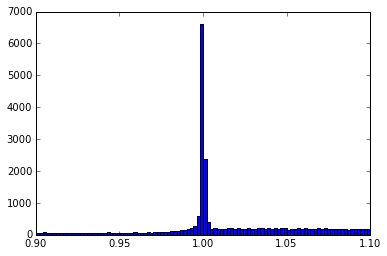

In [159]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM
ratio  = ratio[ratio<2]
plt.hist(ratio, bins = 1000)
plt.xlim(0.9, 1.1)

In [160]:
df_scatter["ratio"] = ratio
df_scatter.query("0.998<ratio<1.002").shape[0]

9021

In [161]:
df_scatter.query("(ZIMPOM == Irpp_decote)").shape

(85, 125)

In [162]:
biologic_path = (u"./Pickle/biologic/biologic_households{}.p".format(year))
biologic = pickle.load( 
        open(biologic_path, 'rb'))

In [163]:
df_scatter = df_scatter[df_scatter.ID_FISC_LOG_DIFF.isin(biologic)]


(0, 1500)

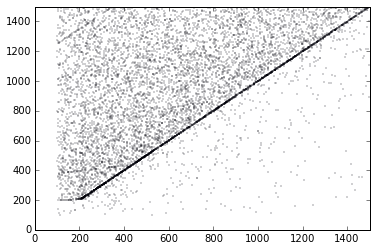

In [164]:
euros_threshold = 100
df_scatter = df_scatter.query("(ZIMPOM>{}) & (Irpp_decote>{})".format(euros_threshold, euros_threshold))
plt.scatter(df_scatter.ZIMPOM, df_scatter.Irpp_decote,  s = 0.05)
plt.xlim((0,1500))
plt.ylim((0,1500))

(0.99, 1.01)

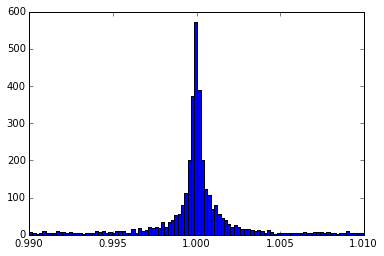

In [165]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM
ratio  = ratio[ratio<2]
plt.hist(ratio.values, bins = 10000)
plt.xlim(0.99, 1.01)

(array([ 1.,  0.,  0., ...,  0.,  0.,  1.]),
 array([ 0.0276383 ,  0.02823543,  0.02883256, ...,  5.99771092,
         5.99830805,  5.99890517]),
 <a list of 10000 Patch objects>)

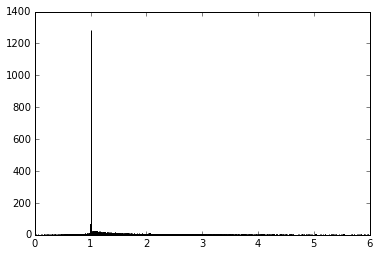

In [166]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM
ratio  = ratio[ratio<6]
plt.hist(ratio.values, bins = 10000)

In [167]:
df_scatter["ratio"] = ratio
df_scatter.query("0.998<ratio<1.002").shape[0]

2686

Biologiques, payent de l'impôt, non touchés par la décote et peuvent optimiser

In [168]:
cant_optimize = (df_scatter.result_min_allocation == df_scatter.result_max_allocation)
not_touched_by_decote = (df_scatter.Irpp_decote==df_scatter.Irpp_ac_plaf_qf)
df_scatter = df_scatter[(~cant_optimize) & not_touched_by_decote ]

(0, 1500)

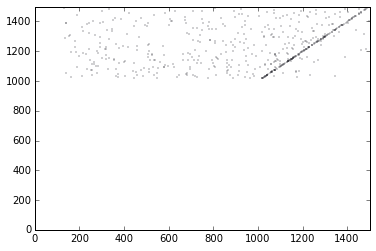

In [169]:

euros_threshold = 100
df_scatter = df_scatter.query("(ZIMPOM>{}) & (Irpp_decote>{})".format(euros_threshold, euros_threshold))
plt.scatter(df_scatter.ZIMPOM, df_scatter.Irpp_decote,  s = 0.05)
plt.xlim((0,1500))
plt.ylim((0,1500))

(0.99, 1.01)

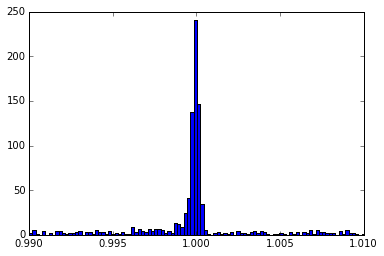

In [170]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM
ratio  = ratio[ratio<2]
plt.hist(ratio.values, bins = 10000)
plt.xlim(0.99, 1.01)

In [171]:
df_scatter["ratio"] = ratio
df_scatter.query("0.998<ratio<1.002").shape[0]

685

Sample C (no decote).

In [172]:
df_scatter = pd.merge(df, df_fiscr, on = "ID_FISC_LOG_DIFF")

In [173]:
cant_optimize = (df_scatter.result_min_allocation == df_scatter.result_max_allocation)
not_touched_by_decote = (df_scatter.Irpp_decote==df_scatter.Irpp_ac_plaf_qf)
df_scatter = df_scatter[(~cant_optimize) & not_touched_by_decote ]

(0, 1500)

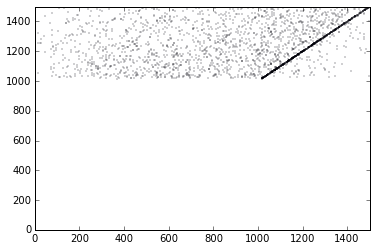

In [174]:

euros_threshold = 0
df_scatter = df_scatter.query("(ZIMPOM>{}) & (Irpp_decote>{})".format(euros_threshold, euros_threshold))
plt.scatter(df_scatter.ZIMPOM, df_scatter.Irpp_decote,  s = 0.05)
plt.xlim((0,1500))
plt.ylim((0,1500))

(0.99, 1.01)

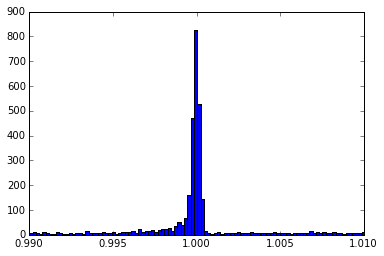

In [175]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM
ratio  = ratio[ratio<2]
plt.hist(ratio.values, bins = 10000)
plt.xlim(0.99, 1.01)

In [176]:
df_scatter["ratio"] = ratio
df_scatter.query("0.998<ratio<1.002").shape[0]

2459

In [177]:
df_scatter.query("(Irpp_decote>100)& (0.998<ratio<1.002)").shape[0]

2459

In [178]:
df_scatter = pd.merge(df, df_fiscr, on = "ID_FISC_LOG_DIFF")
df_scatter = df_scatter[df_scatter.ID_FISC_LOG_DIFF.isin(biologic)]

In [179]:
(
(df_scatter.Irpp_decote - df_scatter.ZIMPOM) <df_scatter.Fiscal_loss).value_counts()

False    46359
True      5969
dtype: int64

In [180]:
((df_scatter.Irpp_decote - df_scatter.ZIMPOM) <df_scatter.Fiscal_loss).value_counts()

False    46359
True      5969
dtype: int64

In [181]:
(((df_scatter.Irpp_decote - df_scatter.ZIMPOM) <df_scatter.Fiscal_loss)& (df_scatter.Fiscal_loss>10)).value_counts()

False    49441
True      2887
dtype: int64

In [182]:
(df_scatter.Fiscal_loss>10).value_counts()

False    39873
True     12455
dtype: int64

In [183]:
(df_scatter.ZIMPOM<0).value_counts(normalize = True)

False    0.740942
True     0.259058
dtype: float64

In [184]:
stop_time = datetime.datetime.now(); print("now: ",stop_time);
execution_time = stop_time - start_time; print("execution_time: ",execution_time)
stop_time = start_time
#clear  memory
%reset -f 

('now: ', datetime.datetime(2019, 4, 26, 17, 47, 56, 889000))
('execution_time: ', datetime.timedelta(0, 225, 604000))
